In [1]:
"""
    uncomment to install the dependencies
    !pip install numpy==1.26.4 pandas==2.2.2 scikit-learn==1.4.2

"""

'\n    uncomment to install the dependencies\n    !pip install numpy==1.26.4 pandas==2.2.2 scikit-learn==1.4.2\n\n'

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA

In [3]:
np.random.seed(45)

iris_data = load_iris()
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['target'] = iris_data.target

df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
43,5.0,3.5,1.6,0.6,0
129,7.2,3.0,5.8,1.6,2
3,4.6,3.1,1.5,0.2,0
34,4.9,3.1,1.5,0.2,0


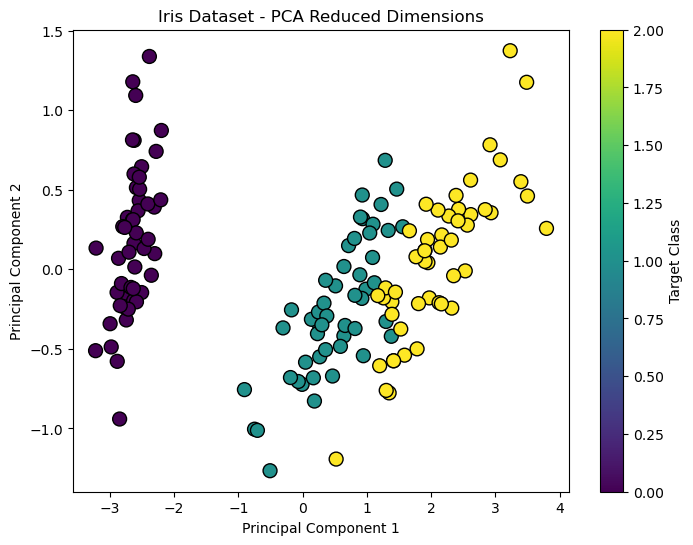

In [4]:
# Apply PCA to reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
iris_2d = pca.fit_transform(iris_data.data)

# Plot the data points with their labels
plt.figure(figsize=(8, 6))
plt.scatter(iris_2d[:, 0], iris_2d[:, 1], c=iris_data.target, cmap='viridis', edgecolor='k', s=100)
plt.title('Iris Dataset - PCA Reduced Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Class')
plt.show()


In [5]:
# Split the dataset into features (X) and target (y)
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Feature scaling to normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Initialize and train the Support Vector Classifier (SVC)
svm_model = SVC(kernel='linear')  # 'linear' kernel is chosen for simplicity
svm_model.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [8]:
# Predict on the test data
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris_data.target_names))


Accuracy: 96.67%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



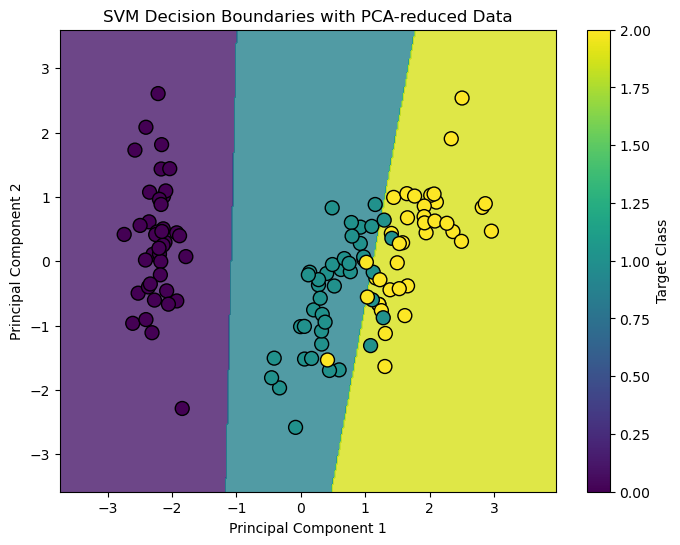

In [9]:
# Apply PCA for 2D visualization of decision boundaries
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# Train the SVM model on 2D data for visualization purposes
svm_model_2d = SVC(kernel='linear')
svm_model_2d.fit(X_train_2d, y_train)

# Create a mesh grid for plotting decision boundaries
h = .02  # Mesh step size
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundaries
Z = svm_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', s=100, cmap='viridis')
plt.title('SVM Decision Boundaries with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Class')
plt.show()


In [10]:
import pickle

# Save the trained SVM model to a file
model_filename = 'svm_model_iris.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(svm_model, file)

print(f"Model saved as {model_filename}")


Model saved as svm_model_iris.pkl
